In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

Q1 A - Import ‘signal-data.csv’ as DataFrame.

In [2]:
#Read csv
signal_data_df = pd.read_csv('signal-data.csv')
signal_data_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


Q1 - Print 5 point summary and share at least 2 observations.

In [3]:
signal_data_df.describe(percentiles=[.25, .5, .75])

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000



Insights:

    1. The standard deviations across the columns vary widely. 
    
    2. Large gaps between the 75th percentile and the maximum values could indicate the presence of potential outliers.

Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [4]:

null_percentage = (signal_data_df.isnull().sum() / len(signal_data_df)) * 100

columns_to_drop = []
columns_to_impute = []

for column in signal_data_df.columns:
    if null_percentage[column] >= 20:
        columns_to_drop.append(column)
    else:
        columns_to_impute.append(column)

# Drop columns with 20%+ null values
data_dropped = signal_data_df.drop(columns=columns_to_drop)

# Impute remaining columns with mean
data_imputed = data_dropped.fillna(data_dropped.mean())

print("Columns Dropped:", columns_to_drop)

print("Columns Imputed with Mean:", columns_to_impute)


Columns Dropped: ['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']
Columns Imputed with Mean: ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125',

C:\Users\Admin\AppData\Local\Temp\ipykernel_5628\3591514433.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_imputed = data_dropped.fillna(data_dropped.mean())


In [5]:
data_imputed

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


Q2 B - Identify and drop the features which are having same value for all the rows.

In [6]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Identify features with the same value for all rows
features_to_drop = []
for column in data_imputed.columns:
    if data_imputed[column].nunique() == 1:
        features_to_drop.append(column)

data_filtered = data_imputed.drop(columns=features_to_drop)

print("Dropped Features:", features_to_drop)

Dropped Features: ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [7]:
data_filtered

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


Q2 C - Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [8]:
import pandas as pd
import numpy as np


correlation_matrix = data_filtered.corr()

# Find pairs of highly correlated features
threshold = 0.9  # correlation threshold
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Create a set to hold feature pairs to drop
features_to_drop = set()
for i, j in zip(*highly_correlated_pairs):
    if i != j and i not in features_to_drop and j not in features_to_drop:
        features_to_drop.add(data_filtered.columns[j])

data_dropped_corr = data_filtered.drop(columns=features_to_drop)

print("Dropped High Corr Features:", features_to_drop)


Dropped High Corr Features: {'343', '389', '340', '415', '167', '317', '433', '491', '584', '280', '208', '251', '324', '334', '252', '278', '420', '250', '521', '553', '134', '143', '362', '388', '213', '524', '413', '301', '188', '390', '201', '426', '223', '216', '460', '68', '511', '147', '202', '412', '540', '423', '428', '300', '140', '583', '93', '456', '161', '253', '523', '166', '268', '269', '35', '575', '305', '180', '587', '539', '321', '299', '291', '424', '162', '53', '218', '196', '273', '409', '48', '100', '151', '164', '441', '211', '445', '408', '548', '342', '430', '410', '176', '439', '351', '248', '419', '160', '576', '320', '452', '478', '33', '51', '341', '457', '352', '137', '544', '95', '407', '416', '323', '318', '214', '386', '203', '356', '527', '331', '254', '98', '212', '155', '494', '447', '567', '24', '476', '357', '146', '337', '156', '120', '210', '391', '555', '349', '550', '274', '361', '350', '170', '3', '304', '308', '205', '228', '71', '442', '360

In [9]:
data_dropped_corr.shape

(1567, 141)

Q2 D - Check for multi-collinearity in the data and take necessary action.

In [10]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_dropped_corr.drop(columns=["Pass/Fail", "Time"])  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_threshold = 10 
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]

# Print features with high VIF
print("Features with High VIF:", high_vif_features)

Features with High VIF:     Feature          VIF
0         0  1964.199334
1         1  1097.339850
2         2  6997.564524
4         6   346.543753
5         7   247.028055
..      ...          ...
129     557   271.084408
130     559   133.284708
131     561   142.647373
132     562  1892.661226
134     570  1169.531011

[86 rows x 2 columns]


We can do a VIF based feature removal to handle multicollinearity. This will be done at the time we create X_train, Y_train.

Data cleansing steps

1. Calculated null percentage for each column and then grouped them into columns to be dropped or imputed based on 20+% null values.

2. Dropped all the features having same values for all rows

3. Found pairs of higly correlated features based on a correlation threshold of 0.9 and dropped them.

4. To check for multicollinearity we have checked for variance inflation factor(VIF) and identified features with high VIF. These features to be removed/handled later while doing training of the data.


Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

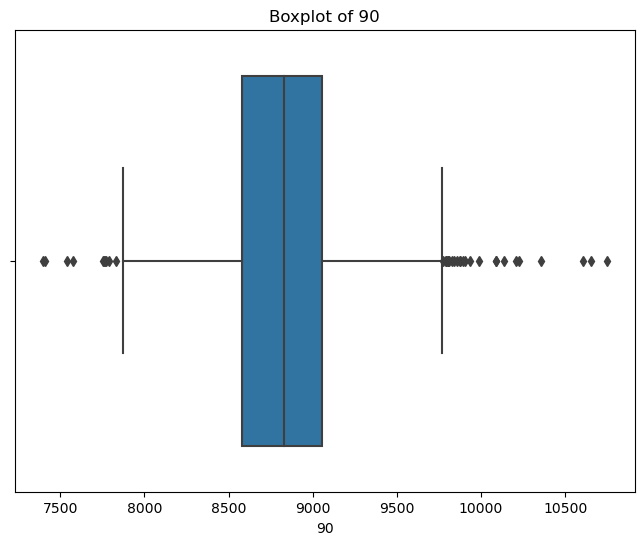

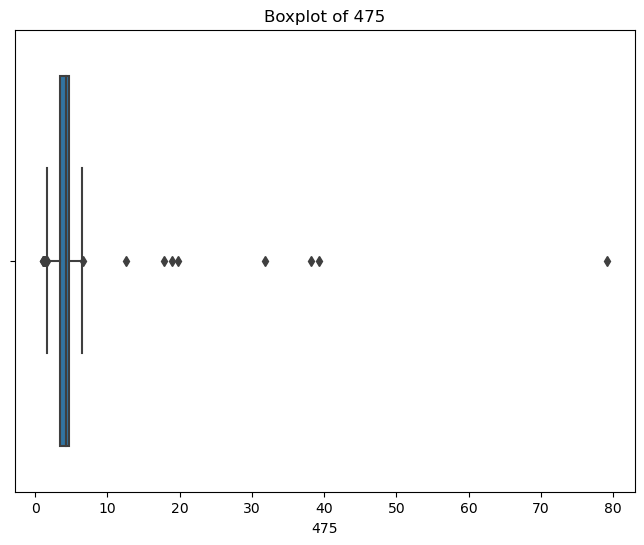

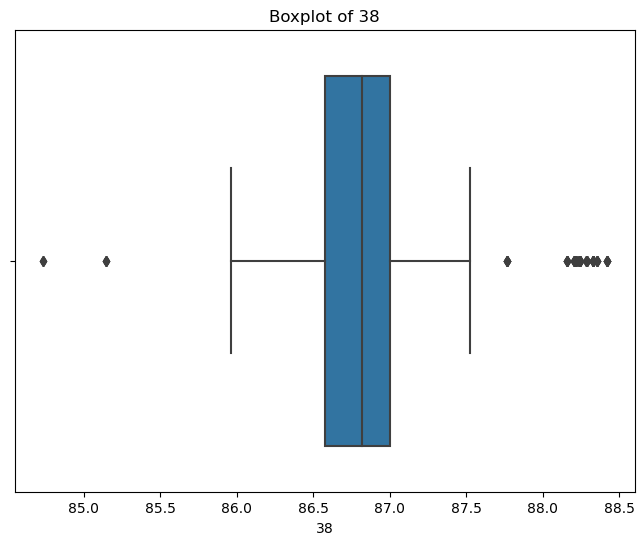

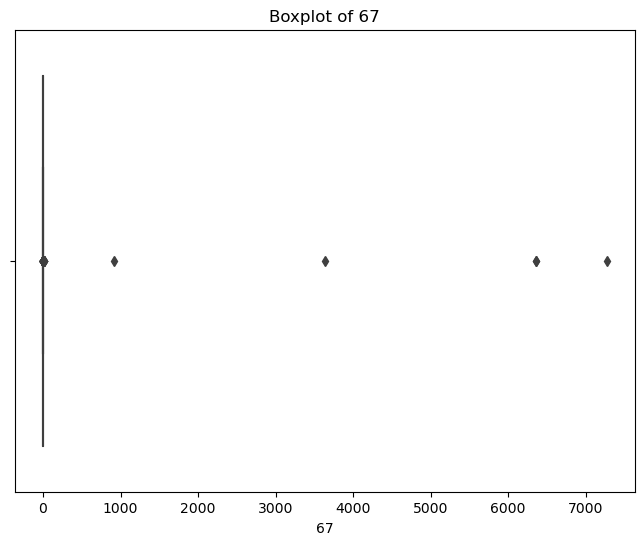

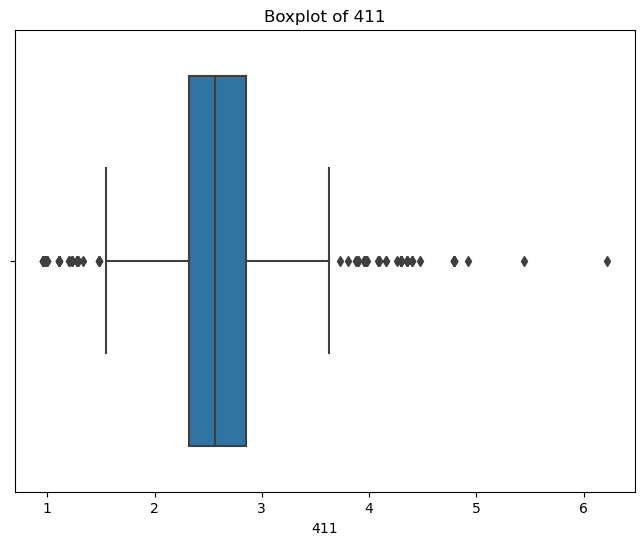

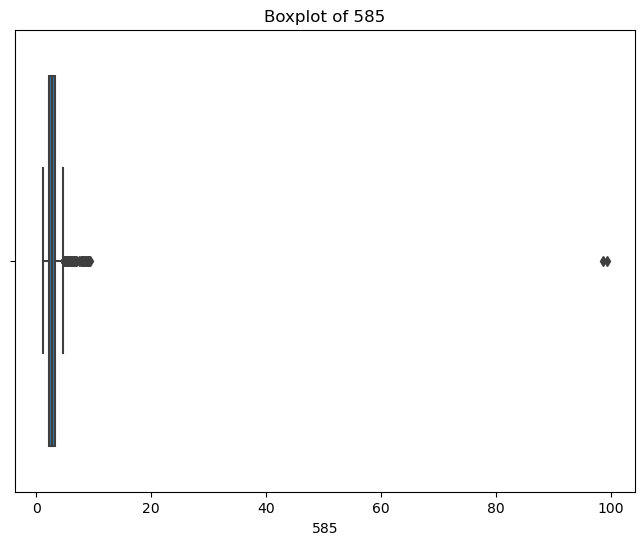

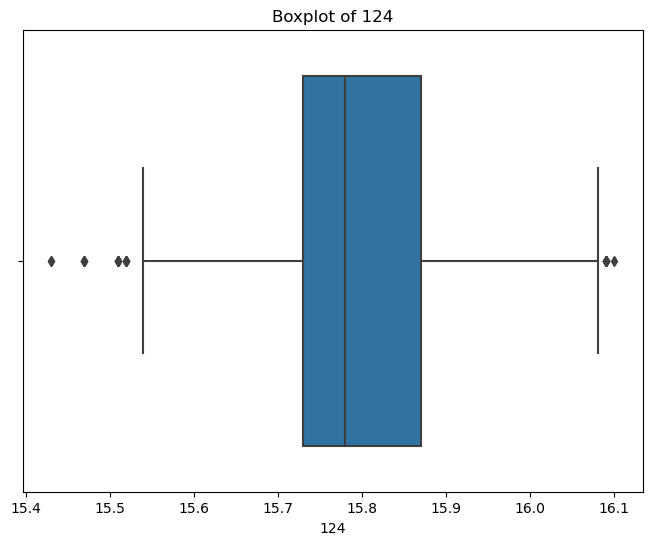

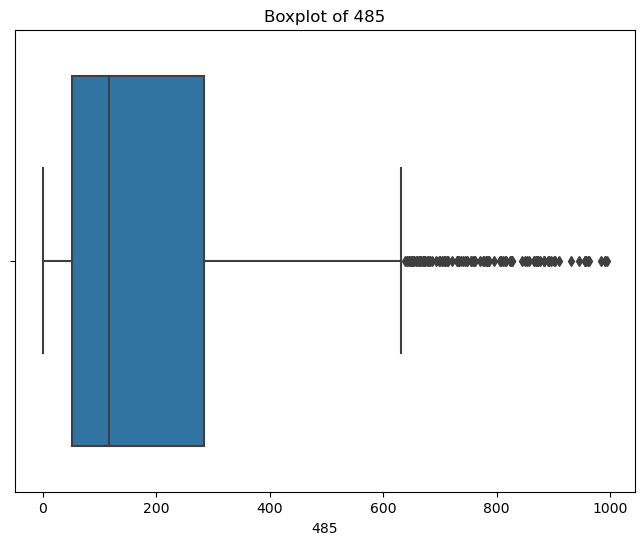

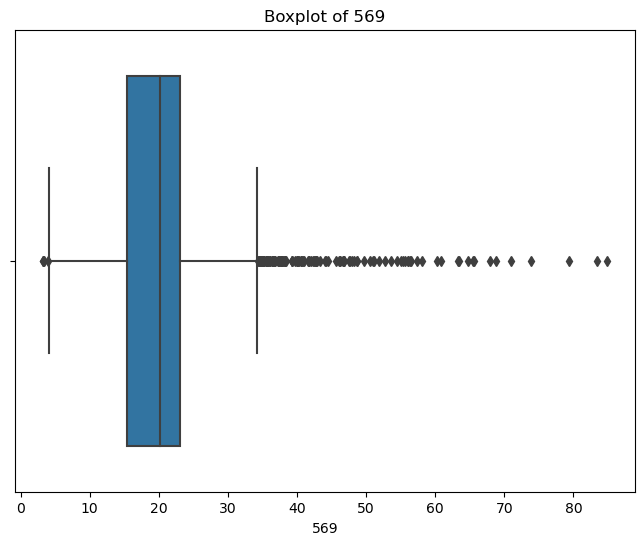

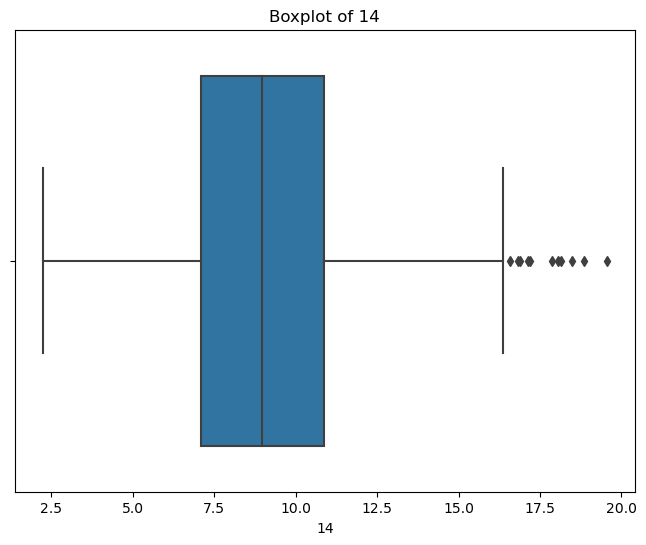

In [11]:
# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select 10 feature columns
selected_features = np.random.choice(data_dropped_corr.columns, size=10, replace=False)

# Create boxplots for the selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_dropped_corr[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

Selecting random 10 columns and drawing boxplots indicates outliers.

Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

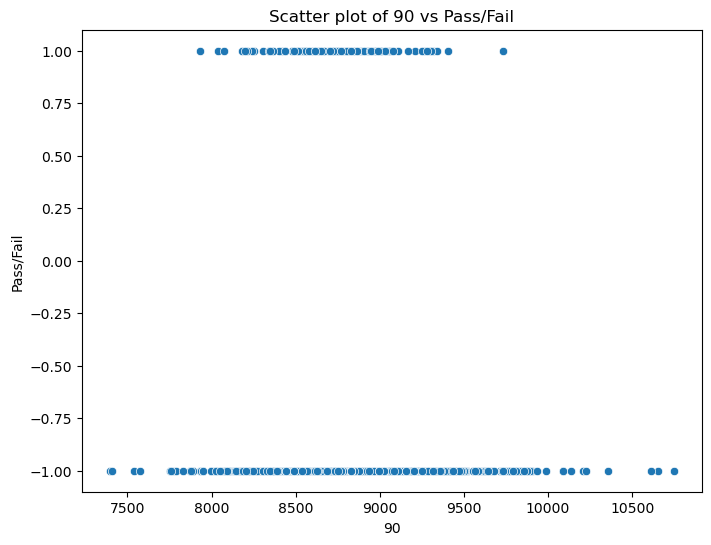

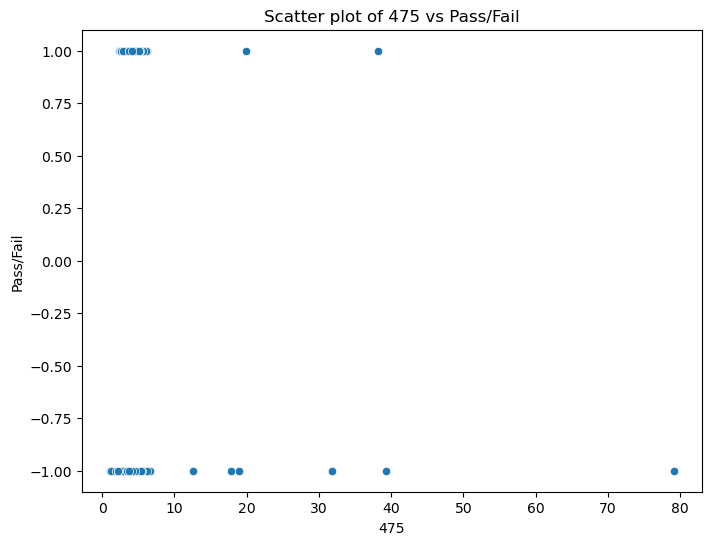

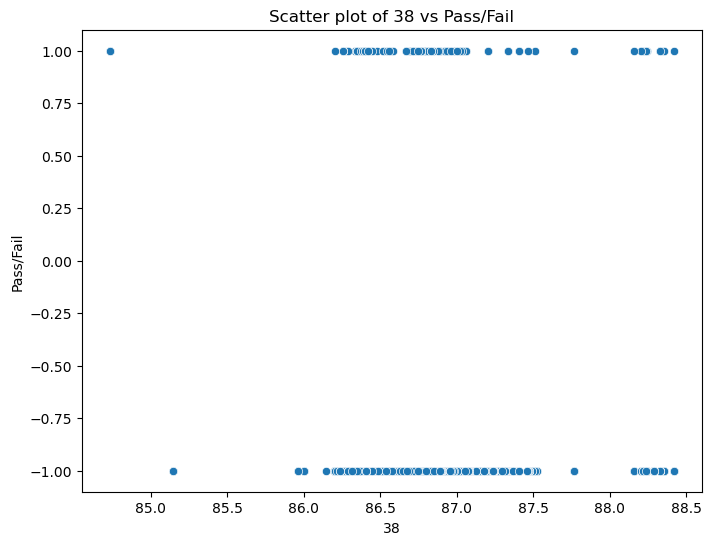

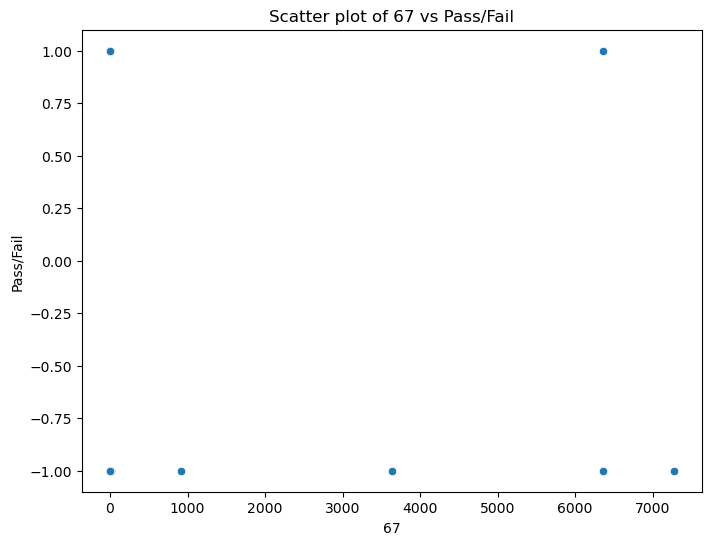

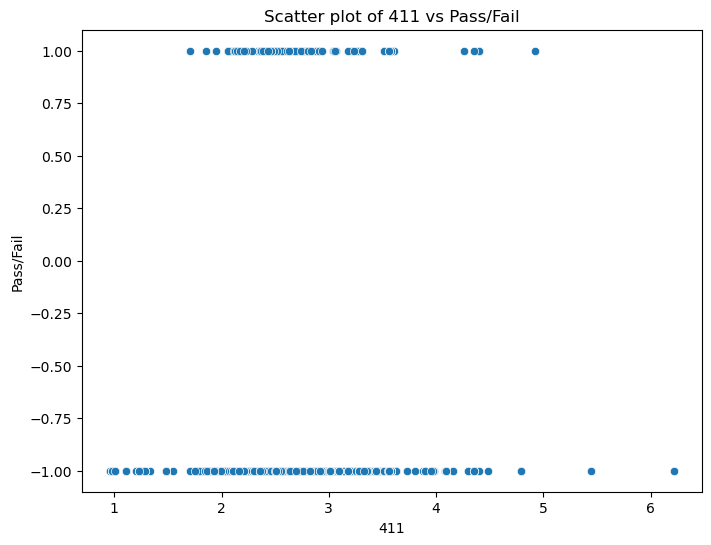

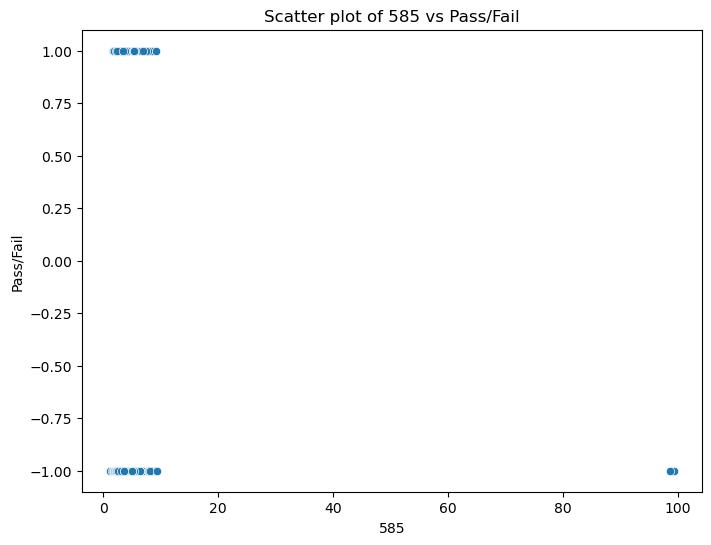

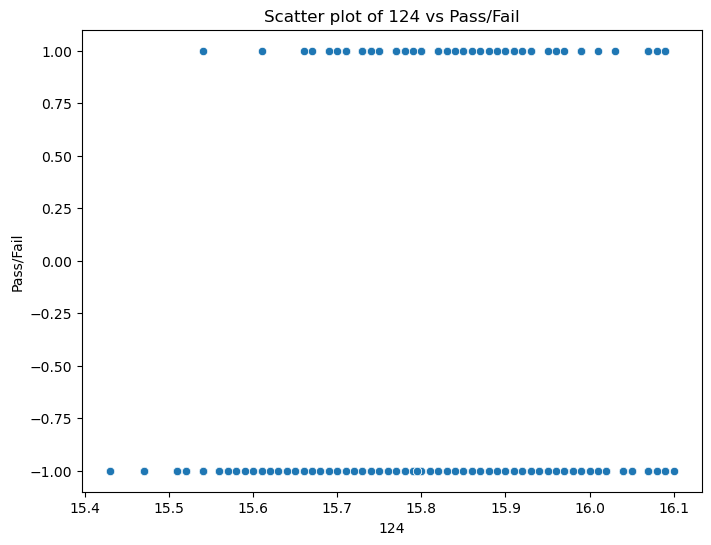

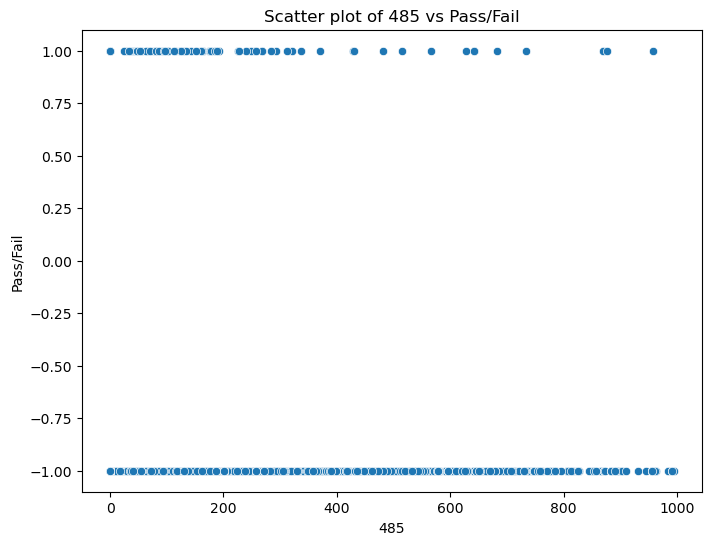

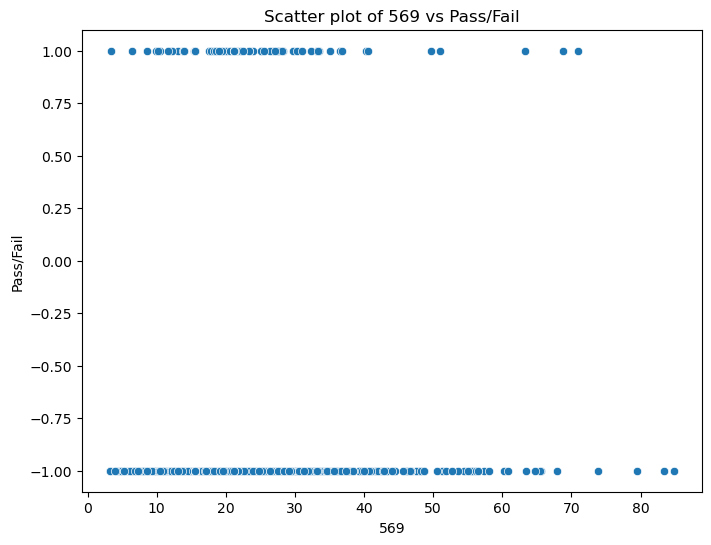

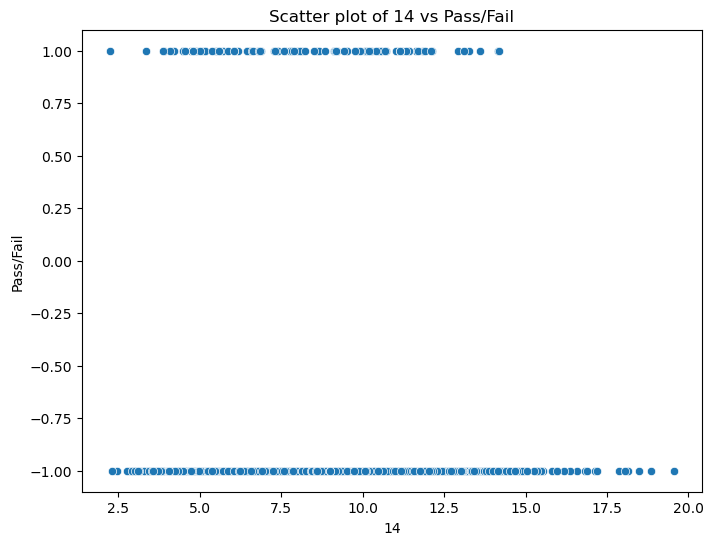

In [12]:
np.random.seed(42)

# Randomly select 10 feature columns
selected_features = np.random.choice(data_dropped_corr.columns, size=10, replace=False)

# Create scatter plots for the selected features against the target 'Pass/Fail'
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_dropped_corr[feature], y=data_dropped_corr['Pass/Fail'])
    plt.title(f'Scatter plot of {feature} vs Pass/Fail')
    plt.xlabel(feature)
    plt.ylabel('Pass/Fail')
    plt.show()

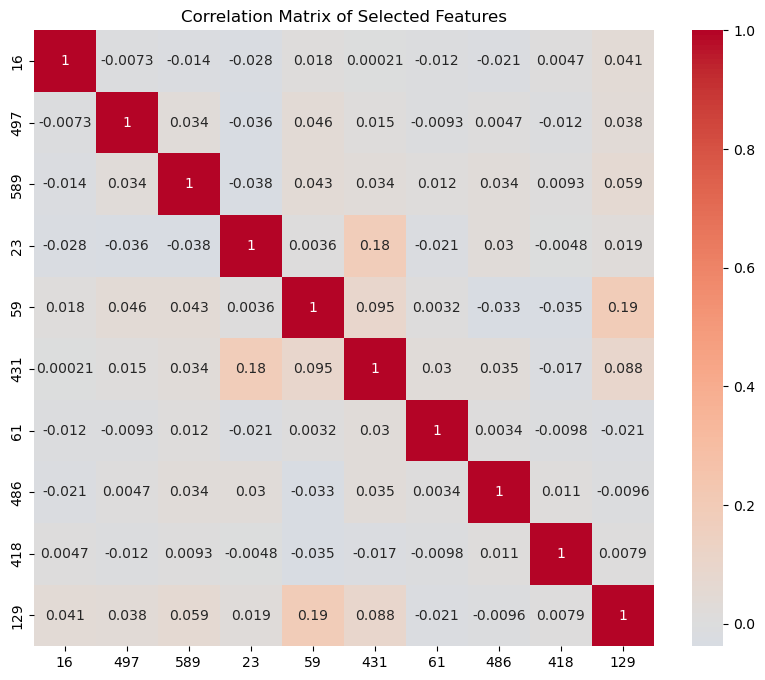

In [13]:
# Randomly select 10 feature columns (excluding 'Pass/Fail')
selected_features = np.random.choice(data_dropped_corr.drop(columns=['Pass/Fail']).columns, size=10, replace=False)

# Create a correlation matrix for the selected features
correlation_matrix = data_dropped_corr[selected_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Q4 A - Segregate predictors vs target attributes.

In [14]:
X = data_dropped_corr.drop(columns=["Pass/Fail", "Time"]) 
y = data_dropped_corr["Pass/Fail"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1567, 139)
y shape: (1567,)


Q4 B - Check for target balancing and fix it if found imbalanced.

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check resampled class distribution
resampled_class_distribution = y_resampled.value_counts()
print("Resampled Class Distribution:")
print(resampled_class_distribution)




Class Distribution:
-1    1463
 1     104
Name: Pass/Fail, dtype: int64
Resampled Class Distribution:
-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


Q4 C - Perform train-test split and standardise the data or vice versa if required.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_names = X_train.columns

X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# Set a threshold for high VIF values
vif_threshold = 10

# Get the high VIF features
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]

# Remove high VIF features from X_train_scaled and X_test_scaled
X_train_scaled = X_train_df.drop(columns=high_vif_features["feature"])
X_test_scaled = X_test_df.drop(columns=high_vif_features["feature"])

Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [17]:
original_stats = X.describe()
train_stats = pd.DataFrame(X_train_scaled).describe()
test_stats = pd.DataFrame(X_test_scaled).describe()

print("Original Data Statistics:")
print(original_stats)

print("\nTrain Data Statistics:")
print(train_stats)

print("\nTest Data Statistics:")
print(test_stats)

Original Data Statistics:
                 0            1            2            4            6  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318     4.197013   101.112908   
std      73.480613    80.227793    29.380932    56.103066     6.209271   
min    2743.240000  2158.750000  2060.660000     0.681500    82.131100   
25%    2966.665000  2452.885000  2181.099950     1.017700    97.937800   
50%    3011.840000  2498.910000  2200.955600     1.317100   101.492200   
75%    3056.540000  2538.745000  2218.055500     1.529600   104.530000   
max    3356.350000  2846.440000  2315.266700  1114.536600   129.252200   

                 7            8            9           10           11  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean      0.121822     1.462862    -0.000841     0.000146     0.964353  ...   
std       0.008936     0.073849     0.015107     0.009296     0.012444

Q5 A - Use any Supervised Learning technique to train a model.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg_model = LogisticRegression()

logreg_model.fit(X_train_scaled, y_train)

train_predictions = logreg_model.predict(X_train_scaled)
test_predictions = logreg_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8521367521367521
Test Accuracy: 0.8327645051194539


Q5 B - Use cross validation techniques.

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(C=1, penalty='l2')

# Define the cross-validation technique
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the scaled data
cross_val_train_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf)
cross_val_test_scores = cross_val_score(model, X_test_scaled, y_test, cv=skf)

# Calculate mean training and test scores
mean_train_score = np.mean(cross_val_train_scores)
mean_test_score = np.mean(cross_val_test_scores)

print("Cross-Validation Mean Training Score:", mean_train_score)
print("Cross-Validation Mean Test Score:", mean_test_score)

Cross-Validation Mean Training Score: 0.8320512820512821
Cross-Validation Mean Test Score: 0.7729972475735187


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Reset indexes of X_train_scaled and y_train
X_train_scaled_reset = pd.DataFrame(X_train_scaled).reset_index(drop=True)
y_train_reset = pd.Series(y_train).reset_index(drop=True)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store training and test scores
train_scores = []
test_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X_train_scaled_reset, y_train_reset):
    X_train_fold, X_test_fold = X_train_scaled_reset.iloc[train_index], X_train_scaled_reset.iloc[test_index]
    y_train_fold, y_test_fold = y_train_reset.iloc[train_index], y_train_reset.iloc[test_index]
    
    # Train your model 
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_fold)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Calculate mean scores
mean_train_score = np.mean(train_scores)
mean_test_score = np.mean(test_scores)

print("Stratified K-Fold Mean Training Score:", mean_train_score)
print("Stratified K-Fold Mean Test Score:", mean_test_score)

Stratified K-Fold Mean Training Score: 1.0
Stratified K-Fold Mean Test Score: 0.9750853242320818


Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

In [21]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define your hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Different values of C
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Create a logistic regression model
logreg = LogisticRegression()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=stratified_kfold, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy with Best Model:", test_accuracy)

C:\Users\Admin\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.8341880341880341
Test Accuracy with Best Model: 0.8327645051194539


C:\Users\Admin\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Q5 D - Use any other technique/method which can enhance the model performance.

In [22]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a PCA instance
pca = PCA(n_components=0.95)

# Create a Gradient Boosting classifier instance
gb_classifier = GradientBoostingClassifier()

# Create a Logistic Regression classifier instance
logreg_classifier = LogisticRegression()

# Create a voting classifier that combines GB and LogReg
voting_classifier = VotingClassifier(
    estimators=[('gb', gb_classifier), ('logreg', logreg_classifier)],
    voting='soft'  # You can use 'hard' or 'soft' voting
)

# Create a pipeline with PCA and the Voting Classifier
pipeline = Pipeline([
    ('pca', pca),
    ('voting', voting_classifier)
])

pipeline.fit(X_train_scaled, y_train)

y_train_pred = pipeline.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy with PCA and Voting Classifier:", train_accuracy)

y_test_pred = pipeline.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with PCA and Voting Classifier:", test_accuracy)

Training Accuracy with PCA and Voting Classifier: 0.9756410256410256
Test Accuracy with PCA and Voting Classifier: 0.9351535836177475


Q5 E - Display and explain the classification report in detail.

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)

print(report)

              precision    recall  f1-score   support

          -1       0.97      0.91      0.94       306
           1       0.91      0.96      0.93       280

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586



Q5 F - Apply the above steps for all possible models that you have learnt so far.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Generate some random data for demonstration
X, y = make_classification(n_samples=1000, n_features=100, random_state=42)

# Create a pipeline with PCA, k-NN, and AdaBoostClassifier
pipeline = Pipeline([
    ('pca', PCA()),  # Apply PCA for dimensionality reduction
    ('knn', FunctionTransformer(lambda X: X)),  # Placeholder for k-NN
    ('adaboost', AdaBoostClassifier())  # Use AdaBoostClassifier
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [50, 100],
    'adaboost__n_estimators': [50, 100],
    'adaboost__learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
train_accuracy = grid_search.best_score_
test_accuracy = grid_search.score(X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

y_pred = grid_search.predict(X_test_scaled)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Best Parameters: {'adaboost__learning_rate': 1.0, 'adaboost__n_estimators': 100, 'pca__n_components': 100}
Training Accuracy: 0.9662393162393161
Test Accuracy: 0.9658703071672355
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.97       306
           1       0.96      0.97      0.96       280

    accuracy                           0.97       586
   macro avg       0.97      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# Train a Support Vector Classifier (SVC)
svc_clf = SVC()
svc_clf.fit(X_train_scaled, y_train)

svc_train_predictions = svc_clf.predict(X_train_scaled)
svc_test_predictions = svc_clf.predict(X_test_scaled)

X_train_combined = np.column_stack((X_train_scaled, svc_train_predictions))
X_test_combined = np.column_stack((X_test_scaled, svc_test_predictions))

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_combined)
X_test_pca = pca.transform(X_test_combined)

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada_clf.fit(X_train_pca, y_train)

y_train_pred = ada_clf.predict(X_train_pca)
y_test_pred = ada_clf.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

report = classification_report(y_test, y_test_pred)
print("Classification Report for Ensemble with PCA:\n", report)

Train Accuracy: 0.958974358974359
Test Accuracy: 0.9334470989761092
Classification Report for Ensemble with PCA:
               precision    recall  f1-score   support

          -1       0.95      0.92      0.94       306
           1       0.92      0.94      0.93       280

    accuracy                           0.93       586
   macro avg       0.93      0.93      0.93       586
weighted avg       0.93      0.93      0.93       586



In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# Train a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_scaled, y_train)

rf_train_predictions = rf_clf.predict(X_train_scaled)
rf_test_predictions = rf_clf.predict(X_test_scaled)

X_train_combined = np.column_stack((X_train_scaled, rf_train_predictions))
X_test_combined = np.column_stack((X_test_scaled, rf_test_predictions))

# Apply PCA to the combined features
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_combined)
X_test_pca = pca.transform(X_test_combined)

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada_clf.fit(X_train_pca, y_train)

# Predict on the test data
y_test_pred = ada_clf.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, rf_train_predictions)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy (Random Forest):", train_accuracy)
print("Test Accuracy (Ensemble):", test_accuracy)

report = classification_report(y_test, y_test_pred)
print("Classification Report for Ensemble with PCA:\n", report)


Train Accuracy (Random Forest): 1.0
Test Accuracy (Ensemble): 0.9419795221843004
Classification Report for Ensemble with PCA:
               precision    recall  f1-score   support

          -1       0.96      0.93      0.94       306
           1       0.93      0.95      0.94       280

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586



Q6 A- Display and compare all the models designed with their train and test accuracies.

Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

Q6 C - Write your conclusion on the results.